<a href="https://colab.research.google.com/github/rachanashinde15/Predicting-bank-deposit-using-deep-learning/blob/main/simple_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import datasets, layers, models,Sequential
from tensorflow.keras.optimizers import Adam

from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras.models import Model
from keras.initializers import glorot_uniform
import matplotlib.pyplot as plt
import numpy as np

In [101]:
(X_train, y_train), (X_test,y_test) = datasets.cifar100.load_data()
X_train.shape

(50000, 32, 32, 3)

In [102]:
X_test.shape

(10000, 32, 32, 3)

In [103]:
y_train.shape


(50000, 1)

In [104]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([19, 29,  0, 11,  1])

In [105]:
y_test = y_test.reshape(-1,)

In [106]:
y_train[:5]


array([19, 29,  0, 11,  1])

In [107]:
#normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [108]:
y_train = keras.utils.to_categorical(y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)

In [109]:
def identity_block(X, f, filters):
   
    
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = BatchNormalization(axis=3)(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [110]:
def convolutional_block(X, f, filters,s=2):
   
    
    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = BatchNormalization(axis=3)(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid')(X_shortcut)
    X_shortcut = BatchNormalization(axis=3)(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [111]:
def ResNet50(input_shape=(32, 32, 3),classes = 100):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], s=1)
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])


    X = convolutional_block(X, f=3, filters=[128, 128, 512], s=2)
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], s=2)
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], s=2)
    X = identity_block(X, 3, [512, 512, 2048])
    X = identity_block(X, 3, [512, 512, 2048])

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    X = Flatten()(X)
    X = Dense(classes, activation='softmax',name='fc' +str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model



In [112]:
#resnet = Sequential()
#pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   #input_shape=None,
                   #pooling='max',classes=100,
                   #weights='imagenet')
#resnet.add(pretrained_model)
#resnet.add(Flatten())
#resnet.add(Dense(512, activation='relu'))
#resnet.add(Dense(5, activation='softmax'))


In [113]:
model = ResNet50(input_shape = (32,32,3),classes=100)

In [114]:
h = model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [115]:
h = model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d_7 (ZeroPadding2  (None, 38, 38, 3)   0           ['input_8[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_371 (Conv2D)            (None, 16, 16, 64)   9472        ['zero_padding2d_7[0][0]']       
                                                                                                  
 batch_normalization_371 (Batch  (None, 16, 16, 64)  256         ['conv2d_371[0][0]']      

In [116]:
h = model.fit(X_train, y_train, validation_data = (X_test,y_test),batch_size=32,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 86s 44ms/step - loss: 4.9826 - accuracy: 0.0713 - val_loss: 4.7996 - val_accuracy: 0.0228
Epoch 2/50
1563/1563 [==============================] - 67s 43ms/step - loss: 4.2205 - accuracy: 0.1108 - val_loss: 5.3350 - val_accuracy: 0.1463
Epoch 3/50
1563/1563 [==============================] - 69s 44ms/step - loss: 3.9103 - accuracy: 0.1353 - val_loss: 5.1806 - val_accuracy: 0.1654
Epoch 4/50
1563/1563 [==============================] - 67s 43ms/step - loss: 3.5611 - accuracy: 0.1825 - val_loss: 5.0668 - val_accuracy: 0.1644
Epoch 5/50
1563/1563 [==============================] - 67s 43ms/step - loss: 3.3428 - accuracy: 0.2156 - val_loss: 3.3668 - val_accuracy: 0.2347
Epoch 6/50
1563/1563 [==============================] - 67s 43ms/step - loss: 3.0574 - accuracy: 0.2596 - val_loss: 3.2350 - val_accuracy: 0.2478
Epoch 7/50
1563/1563 [==============================] - 69s 44ms/step - loss: 2.8396 - accuracy: 0.2966 - val_loss: 11.5082 

Text(0, 0.5, 'Training loss')

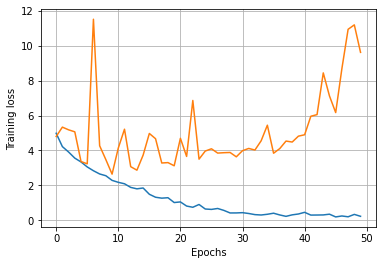

In [117]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training loss')

Text(0, 0.5, 'Training Accuracy')

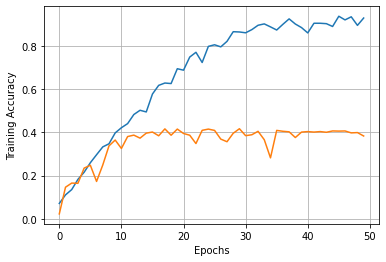

In [118]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

In [121]:
scores = model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 9.6136 - accuracy: 0.3832
